In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount your Google Drive to access the project files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_path = '/content/drive/MyDrive/ds_anshul/'
csv_path = project_path + 'csv_files/'
output_path = project_path + 'outputs/'

In [4]:
trader_df = pd.read_csv(csv_path + 'historical_data.csv')
sentiment_df = pd.read_csv(csv_path + 'fear_greed_index.csv')

In [7]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [9]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

### Trader Data Cleaning

In [7]:
# Convert 'Timestamp IST' to datetime objects
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [8]:
# Extract date for merging
trader_df['Date'] = trader_df['Timestamp IST'].dt.date

In [9]:
# Ensure numeric types for key columns
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')

In [10]:
# Drop rows with NaN values in crucial columns that might have resulted from coercion
trader_df.dropna(subset=['Size USD', 'Closed PnL'], inplace=True)

In [12]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### Sentiment Data Cleaning

In [13]:
# Convert 'date' to datetime objects
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['Date'] = sentiment_df['date'].dt.date

### Merging Datasets

In [14]:
# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification', 'value']], on='Date', how='inner')

In [16]:
# Create a simplified sentiment category for better grouping
def simplify_sentiment(c):
    if 'Extreme Fear' in c:
        return 'Extreme Fear'
    if 'Fear' in c:
        return 'Fear'
    if 'Greed' in c:
        return 'Greed'
    if 'Extreme Greed' in c:
        return 'Extreme Greed'
    return 'Neutral'

merged_df['Sentiment Category'] = merged_df['classification'].apply(simplify_sentiment)
# Define the order for plotting
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

In [17]:
import os

In [18]:
if not os.path.exists('outputs'):
    os.makedirs('outputs')

In [19]:
sns.set(style="whitegrid", palette="viridis")

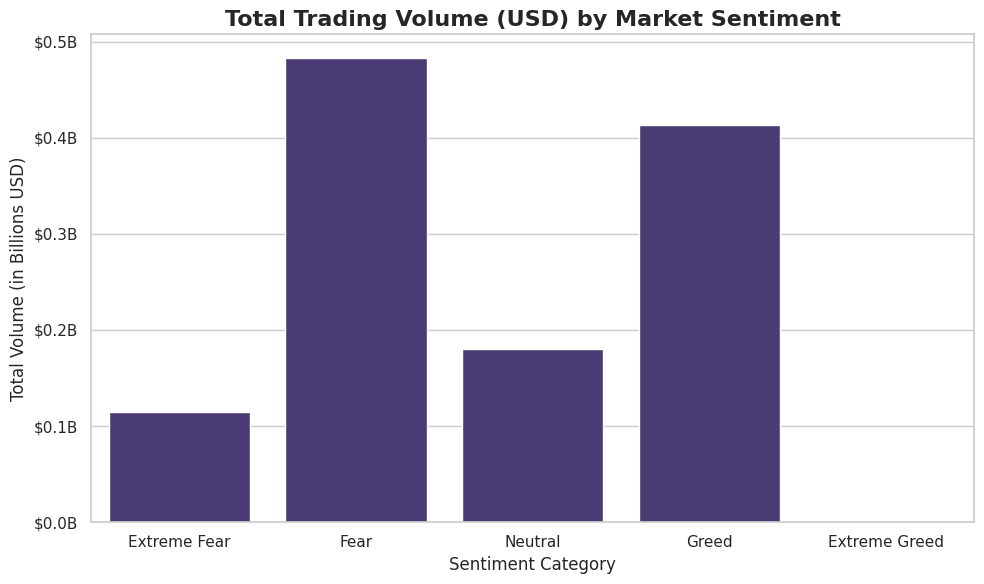

In [20]:
# Volume vs. Sentiment
volume_by_sentiment = merged_df.groupby('Sentiment Category')['Size USD'].sum().reindex(sentiment_order)

plt.figure(figsize=(10, 6))
volume_plot = sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, order=sentiment_order)
plt.title('Total Trading Volume (USD) by Market Sentiment', fontsize=16, fontweight='bold')
plt.ylabel('Total Volume (in Billions USD)')
plt.xlabel('Sentiment Category')
# Formatter to show billions
volume_plot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/volume_vs_sentiment.png')
plt.show()

/tmp/ipython-input-561691514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm', order=sentiment_order)


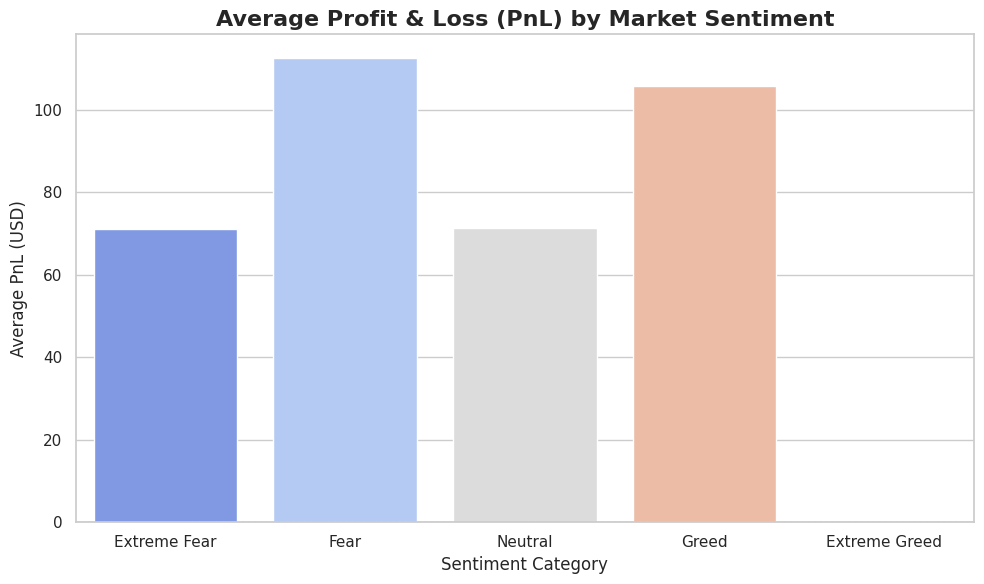

In [22]:
# Profitability (PnL) vs. Sentiment
pnl_df = merged_df[merged_df['Closed PnL'] != 0].copy()
avg_pnl_by_sentiment = pnl_df.groupby('Sentiment Category')['Closed PnL'].mean().reindex(sentiment_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm', order=sentiment_order)
plt.title('Average Profit & Loss (PnL) by Market Sentiment', fontsize=16, fontweight='bold')
plt.ylabel('Average PnL (USD)')
plt.xlabel('Sentiment Category')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.savefig('outputs/pnl_vs_sentiment.png')
plt.show()

/tmp/ipython-input-858246974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_by_sentiment.index, y=risk_by_sentiment.values, palette='plasma', order=sentiment_order)


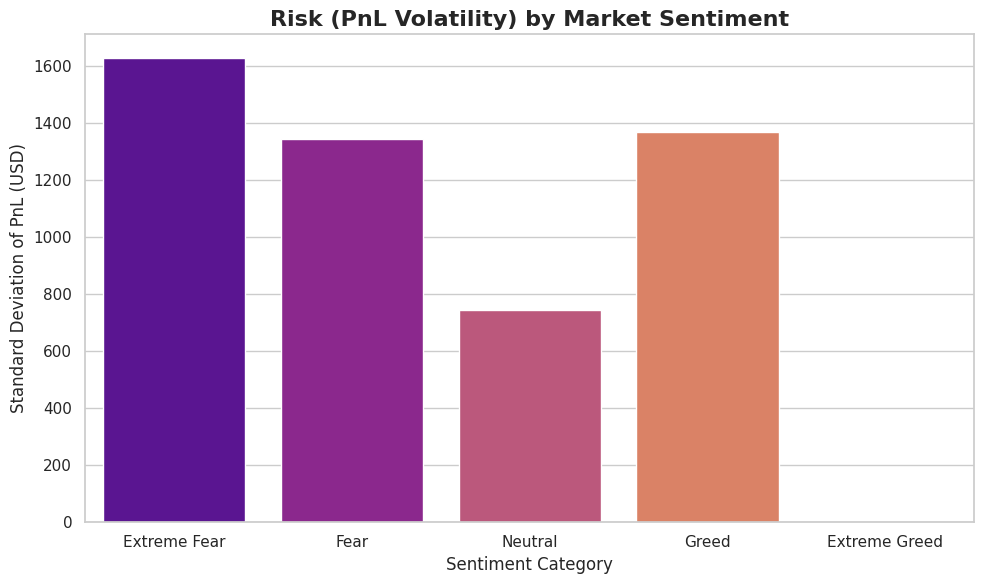

In [23]:
# Risk (PnL Volatility) vs. Sentiment

risk_by_sentiment = pnl_df.groupby('Sentiment Category')['Closed PnL'].std().reindex(sentiment_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=risk_by_sentiment.index, y=risk_by_sentiment.values, palette='plasma', order=sentiment_order)
plt.title('Risk (PnL Volatility) by Market Sentiment', fontsize=16, fontweight='bold')
plt.ylabel('Standard Deviation of PnL (USD)')
plt.xlabel('Sentiment Category')
plt.tight_layout()
plt.savefig('outputs/risk_vs_sentiment.png')
plt.show()

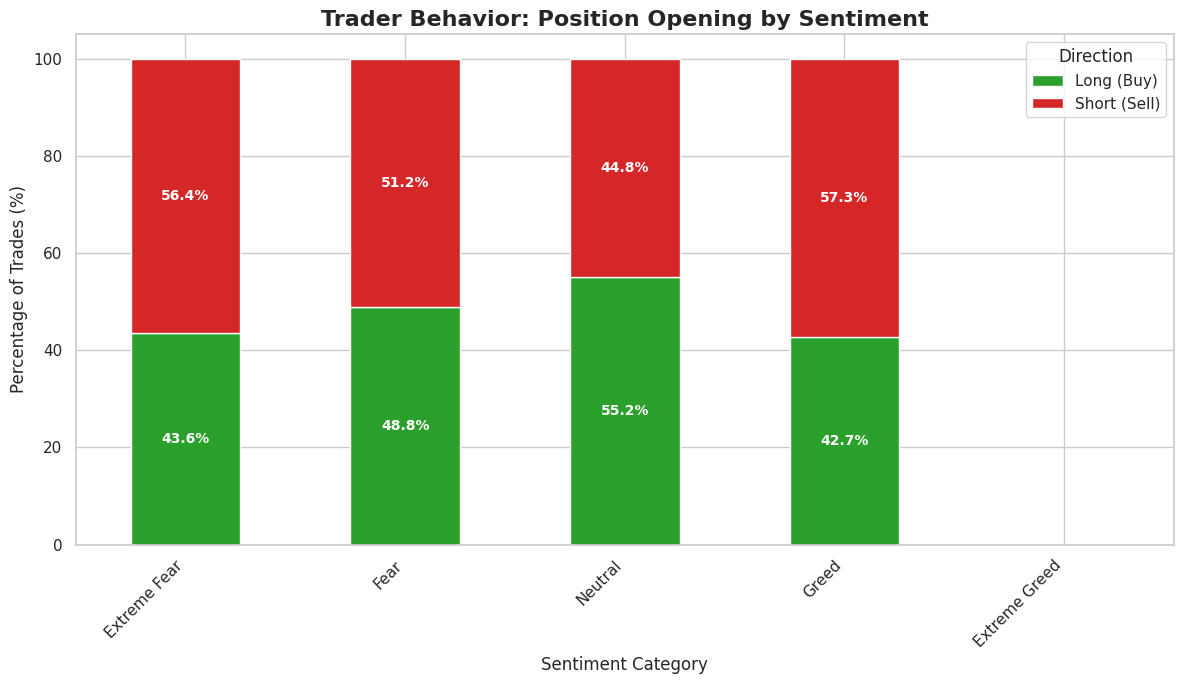

In [24]:
# Trader Behavior (Long vs. Short) vs. Sentiment
opening_trades = merged_df[merged_df['Direction'].isin(['Buy', 'Sell'])].copy()
behavior_counts = opening_trades.groupby(['Sentiment Category', 'Direction']).size().unstack(fill_value=0)
behavior_counts = behavior_counts.reindex(sentiment_order)

# Calculate percentage
behavior_perc = behavior_counts.div(behavior_counts.sum(axis=1), axis=0) * 100

ax = behavior_perc.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#2ca02c', '#d62728'])
plt.title('Trader Behavior: Position Opening by Sentiment', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Trades (%)')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Direction', labels=['Long (Buy)', 'Short (Sell)'])

# Add percentage labels to the bars
for c in ax.containers:
    # Custom label formatting
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white', weight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('outputs/behavior_vs_sentiment.png')
plt.show()